In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [3]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [4]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]


n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.175154     0.0945027
  0.176383     0.112269
  0.183775     0.0661416
  0.237365     0.131733
  0.297765     0.144191
  0.161519     0.109348
 -0.00524237   0.169227
  0.074695     0.134374
  0.0497473    0.158373
  0.488167     0.1785
  ⋮            
  0.010878     0.10935
  0.104905     0.0572895
  0.217177     0.101927
  0.176037     0.0866233
  0.247712     0.116964
  0.275555     0.114322
  0.191943     0.117057
  0.0636473    0.0588576
  0.000258756  0.0546747

In [152]:
Y = collect(test_returns[2:end,:])
T = n_samples
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2

#Β = [randn(n_variables, n_variables+1) for _ in 1:k]

Β1 = [.06 .35 .25; .035 .2 .65]

Β2 = [-.05 .45 .15; .035 .15 .63]

Β = [Β1, Β2]

#= Σ1 = cor2cov([1 .1; .1 1], [.05, .02])
Σ2 = cor2cov([1 .5; .5 1], [.10, .05]) =#

Σ = rand(InverseWishart(4, [.001 0; 0 .015]),k)

#init_regimes = rand(k) 
#init_regimes = init_regimes ./ sum(init_regimes)

t_m = [.6 .4;.4 .6]

result = expectation_maximisation(Y, X, k, Β, Σ, t_m, 50)



SingularException: SingularException(3)

In [137]:
round.(result.smoothed_regimes, digits=4)

999×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [138]:
result.Β


2-element Vector{Any}:
 [87157.98164053401 322324.94149244385 217724.62526274507; 36735.22068462292 105079.79812964927 657838.5233740872]
 [0.07982862362929324 0.29426804499657006 0.19763096707832406; 0.03362548804190074 0.09593293533245553 0.6004696289461733]

In [139]:
result.Σ

2-element Vector{Any}:
 [0.010950066831080548 0.0008361980417759109; 0.000836198041775911 0.0010545459956763609]
 [0.010946961285392177 0.000834637076947447; 0.000834637076947447 0.0010542644673700744]

In [140]:
result.transition_matrix

2×2 Matrix{Float64}:
 2.90689e-158  0.569111
 3.02971e-158  0.68213

In [141]:
sum(result.transition_matrix, dims=2)

2×1 Matrix{Float64}:
 0.5691114599650094
 0.6821300101301514

In [142]:
l = result.likehoods

2000-element Vector{Float64}:
   -1444.8399587810316
   -4553.15857601855
   -8843.458520501097
  -28673.337067382257
  -60258.69675714202
  -90252.91806639242
 -114154.2880699501
 -132297.0192743417
 -145775.22514722444
 -155490.98494408315
       ⋮
 -187900.71071698258
 -187900.71071689992
 -187900.7107168182
 -187900.71071673636
 -187900.71071665525
 -187900.7107165729
 -187900.710716491
 -187900.71071640952
 -187900.71071632742

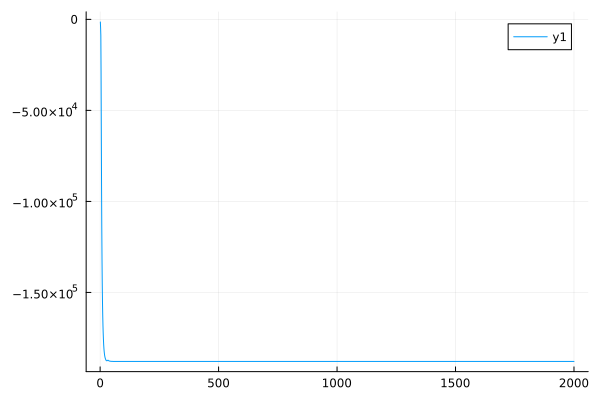

In [143]:
plot(l)

In [144]:
init_regimes =  initial_regimes_probs(result.transition_matrix)

2-element Vector{Float64}:
 0.14935276853450166
 0.7971232676555056

In [145]:
log_likehood(Y,X,result.Β, result.Σ, result.transition_matrix, init_regimes)

-187900.7107163274 + 0.0im